# HHCART(D) on the Hamarat et al. 2013 Model (Categorical Excluded)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

from ema_workbench import load_results
from ema_workbench.analysis import RuleInductionType
from ema_workbench.analysis.feature_scoring import get_ex_feature_scores

from HHCART_SD import HHCartD, load_model
from notebook_helpers.plot_outcomes_lineplot_gaussian import plot_fraction_renewables
from notebook_helpers.clean_hamarat import clean_results
from notebook_helpers.run_hhcart_over_top_features import run_hhcart_over_top_features
from src.config.paths import HAMARAT_DATA_DIR

## Load and Clean the Data

In [2]:
# Load results
experiments, outcomes = load_results(HAMARAT_DATA_DIR / "10000_lhs_2010_2050.tar.gz")

# Clean data → get X and y
X, y_continuous = clean_results(experiments, outcomes)

 ## Plot the Data

Figure saved: renewables_over_time_0_6_threshold.pdf


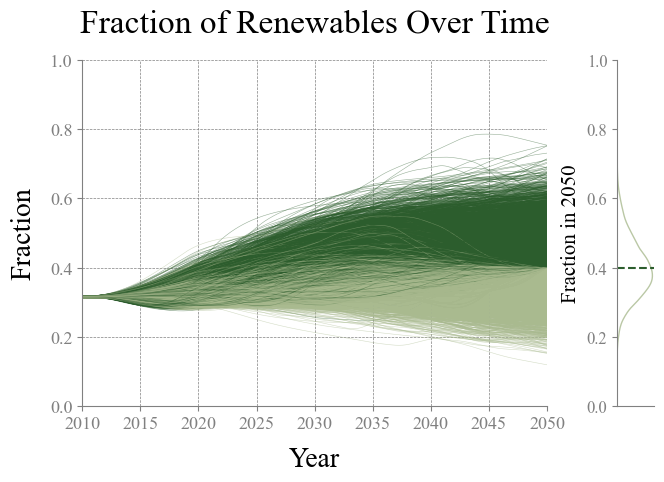


At threshold of 40.0% renewables by 2050:
   → 46.4% of cases exceed threshold (4637 of 10000)
   → 53.6% of cases fall below threshold (5363 of 10000)


In [3]:
plot_fraction_renewables(outcomes, threshold=0.4, save_path="renewables_over_time_0_6_threshold.pdf")

## Set Binary Threshold for y

In [4]:
threshold_value = 0.4  # for example
y = (y_continuous > threshold_value).astype(int)

## Change Categorical Variables to Dummy Variables

In [5]:
# Drop SWITCH columns, as they are not needed for the analysis
switch_cols = [col for col in X.columns if col.startswith("Switch")]
X = X.drop(columns=switch_cols)

## Applying HHCART(D)

In [6]:
# Set tree parameters
max_depth = 8
min_purity = 0.95
mass_min = 0.05

# Instantiate HHCART, build and save tree
hh = HHCartD(X, y, min_purity=min_purity, mass_min=mass_min, max_depth=max_depth)
hh.build_tree(f"hamarat_depth_{max_depth}_pur_{str(min_purity).replace('.', '_')}_mass_{str(mass_min).replace('.', '_')}_no_categorical")

[INFO] Building HHCartD oblique decision tree...
[INFO] Max number of nodes allowed by maximum depth constraint: 511 (used as progress bar target; actual number of splits unknown in advance).


Building tree nodes:  14%|█▍        | 71/511 [30:12<3:07:13, 25.53s/it] 


[INFO] Pruning the full tree and evaluating metrics at each depth level; storing pruned trees and metrics...
[SAVED] HHCartD model saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\F_testing_on_policy_model\data\hamarat_depth_8_pur_0_95_mass_0_05_no_categorical\model
[OK] Tree of depth 8 built and saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\F_testing_on_policy_model\data\hamarat_depth_8_pur_0_95_mass_0_05_no_categorical


In [18]:
hh = load_model("hamarat_depth_8_pur_0_95_mass_0_05_no_categorical")
hh.select(depth=3)
hh.inspect()

[LOADED] HHCartD model loaded from: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\F_testing_on_policy_model\data\hamarat_depth_8_pur_0_95_mass_0_05_no_categorical\model
[OK] Selected tree at depth 3.

[INSPECT] Inspecting tree at selected depth 3...

[Node id=0, depth=0, impurity=0.4763] (split: +0.00*x0 +0.00*x1 -0.00*x2 -0.01*x3 -0.01*x4 -0.00*x5 -0.00*x6 +0.00*x7 -0.00*x8 +0.00*x9 +0.00*x10 +0.00*x11 +0.00*x12 +0.00*x13 +0.00*x14 -0.00*x15 +0.00*x16 -0.00*x17 +0.00*x18 +0.00*x19 +0.00*x20 +0.00*x21 +0.00*x22 -0.00*x23 -0.00*x24 -0.00*x25 -0.00*x26 +1.00*x27 +0.00*x28 +0.00*x29 -0.00*x30 +0.00*x31 -0.00*x32 + -2029.52 >= 0)
├── [Node id=1, depth=1, impurity=0.4184] (split: +0.00*x1 -0.00*x2 -0.00*x3 +0.00*x4 +0.00*x5 -0.00*x6 +0.00*x7 +0.00*x8 -0.00*x9 +0.00*x10 -0.00*x26 +0.00*x27 +1.00*x28 +0.00*x30 -0.00*x31 -0.00*x32 + -1.07 >= 0)
├── ├── [Node id=2, depth=2, impurity=0.4710] (split: +0.00*x0 -0.00*x1 -0.00*x2 -0.00*x3 +0.00*x4 -0.00*x5 -

In [19]:
hh.plot_tree_structure(depth=6, save=True)

[SAVE] Graphviz tree saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\F_testing_on_policy_model\data\hamarat_depth_8_pur_0_95_mass_0_05_no_categorical/tree_structure_d6.pdf


[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\F_testing_on_policy_model\data\hamarat_depth_8_pur_0_95_mass_0_05_no_categorical\metrics_vs_depth.pdf


(<Figure size 600x450 with 1 Axes>,
 <Axes: title={'center': 'Performance Metrics vs. Tree Depth'}, xlabel='Tree Depth', ylabel='Score'>)

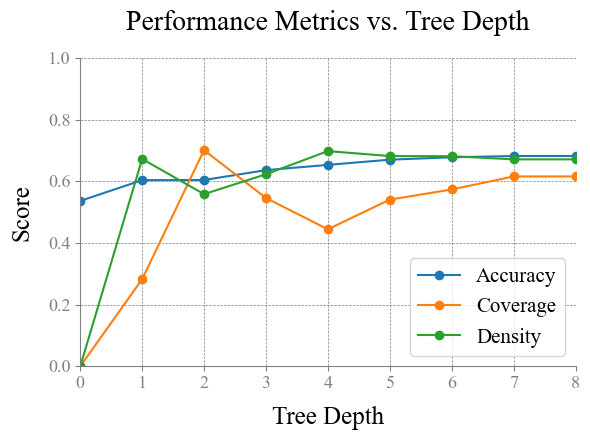

In [20]:
hh.plot_metrics_vs_structure(save=True)

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\F_testing_on_policy_model\data\hamarat_depth_8_pur_0_95_mass_0_05_no_categorical\metrics_vs_class1_leaf_count.pdf


(<Figure size 600x450 with 1 Axes>,
 <Axes: title={'center': 'Performance Metrics vs. Class 1 Leaf Count'}, xlabel='Class 1 Leaf Count', ylabel='Score'>)

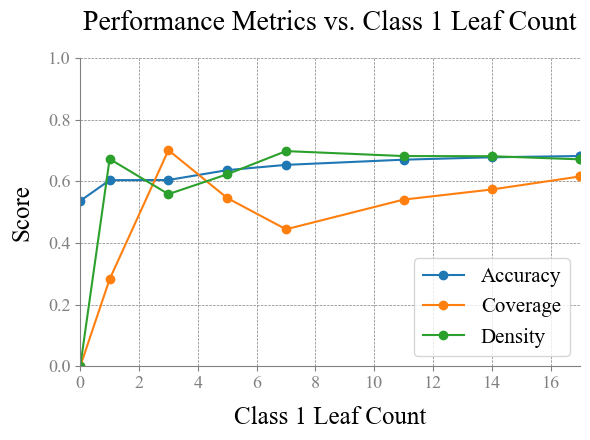

In [21]:
hh.plot_metrics_vs_structure(save=True, x_axis="class1_leaf_count")

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\F_testing_on_policy_model\data\hamarat_depth_8_pur_0_95_mass_0_05_no_categorical\coverage_density_path_depth.pdf


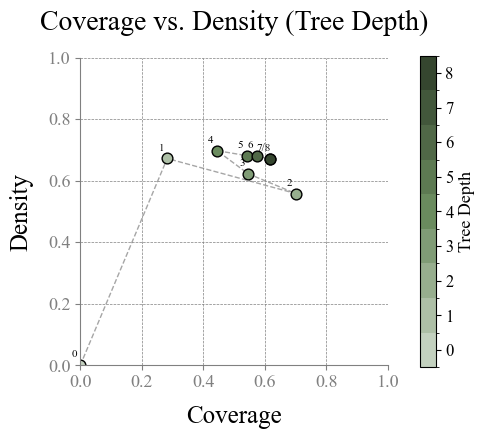

In [22]:
hh.plot_tradeoff_path(save=True)

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\F_testing_on_policy_model\data\hamarat_depth_8_pur_0_95_mass_0_05_no_categorical\coverage_density_path_class1_leaf_count.pdf


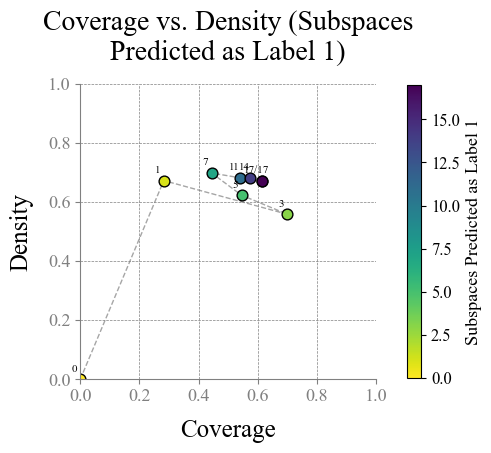

In [23]:
hh.plot_tradeoff_path(save=True, color_by="class1_leaf_count")

[SAVED] Figure saved to: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\F_testing_on_policy_model\data\hamarat_depth_8_pur_0_95_mass_0_05_no_categorical\node_size_distribution.pdf


(<Figure size 550x400 with 1 Axes>,
 <Axes: title={'center': 'Node Size Distribution by Depth'}, xlabel='Tree Depth', ylabel='Samples per Node'>)

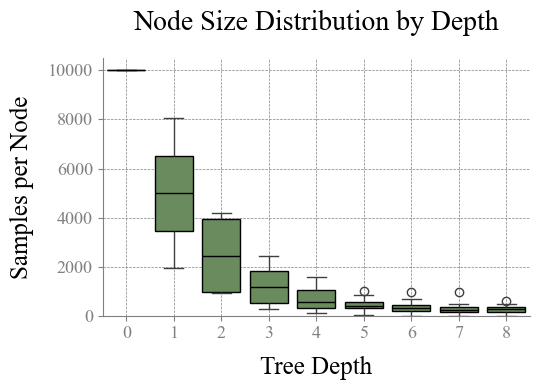

In [24]:
hh.plot_node_size_distribution(save=True)